In [158]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import dataset
from matplotlib import pyplot as plt
import numpy as np

In [159]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.1307,),(0.3081,))
])
mnist_train = torchvision.datasets.MNIST('./data', train = True, download = True, transform = transform)

In [160]:
mnist_test = torchvision.datasets.MNIST('./data', train = False, download = True, transform = transform)

In [161]:
len(mnist_train)

60000

In [162]:
len(mnist_test)

10000

In [163]:
image = mnist_train.data[0]

In [164]:
image.shape

torch.Size([28, 28])

In [165]:
image[0][0]

tensor(0, dtype=torch.uint8)

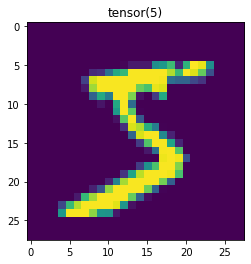

In [166]:
plt.imshow(image)
plt.title(mnist_train.targets[0])
plt.show()

In [167]:
train_loader = DataLoader(mnist_train, batch_size = 1000, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 1000, shuffle = False)

In [168]:
for x, y in train_loader:
    print(x.shape, y.shape)
    print(x[0][0][0][0], y[0])
    break

torch.Size([1000, 1, 28, 28]) torch.Size([1000])
tensor(-0.4242) tensor(5)


In [169]:
class Net(nn.Module):
    def __init__(self, hidden_feature_size=100):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5) #feature extraction
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5) #feature extraction
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(hidden_feature_size, 10)
        self.dp = nn.Dropout2d()
        self.relu = nn.ReLU()
    def forward(self, x):
        x = nn.functional.max_pool2d(self.dp(self.relu(self.conv1(x))),2)#nn.functional gej funktsee shuud ashiglana 
        x = nn.functional.max_pool2d(self.dp(self.relu(self.conv2(x))),2)
        x = x.view(-1, 320)
        x = self.relu(self.fc1(x))
        x = nn.functional.log_softmax(self.fc2(x), dim = -1)
        return x

In [170]:
dummy_data = torch.rand(10, 1, 28, 28)

In [171]:
dummy_data.shape

torch.Size([10, 1, 28, 28])

In [172]:
net = Net()

In [173]:
out = net(dummy_data)
out.shape

torch.Size([10, 10])

In [174]:
out

tensor([[-2.2190, -2.2729, -2.2936, -2.3057, -2.2569, -2.3696, -2.3600, -2.3626,
         -2.3172, -2.2794],
        [-2.2108, -2.2692, -2.2749, -2.3502, -2.2618, -2.3629, -2.3509, -2.3423,
         -2.3058, -2.3081],
        [-2.2978, -2.3135, -2.2546, -2.2413, -2.2221, -2.3967, -2.3753, -2.4023,
         -2.2901, -2.2517],
        [-2.1807, -2.3483, -2.2200, -2.2214, -2.3513, -2.3445, -2.3876, -2.3336,
         -2.4210, -2.2473],
        [-2.2291, -2.3005, -2.2626, -2.3326, -2.2729, -2.3389, -2.3603, -2.3439,
         -2.3130, -2.2801],
        [-2.2165, -2.2880, -2.2773, -2.2943, -2.2766, -2.3577, -2.3614, -2.3646,
         -2.2996, -2.2994],
        [-2.1971, -2.4797, -2.2776, -2.3441, -2.2459, -2.4560, -2.2877, -2.3124,
         -2.2990, -2.1702],
        [-2.1850, -2.3032, -2.2694, -2.2958, -2.3128, -2.3159, -2.3496, -2.3571,
         -2.3429, -2.3054],
        [-2.2323, -2.3516, -2.2570, -2.4348, -2.2284, -2.4116, -2.2777, -2.3195,
         -2.2994, -2.2378],
        [-2.2442, -

In [175]:
def train(net, train_loader, test_loader, loss_fn, optimizer, epochs):
    net.train()
    accuracy = torch.tensor([0.])
    for x, y in train_loader:
        optimizer.zero_grad()
        preds = net(x)
        print(preds.shape)
        loss = loss_fn(preds, y)
        loss.backward() #backpropagation, update hiideg
        optimizer.step()
        print(net.fc2.weight.grad[0][0])
        print(net.fc1.weight.grad[0][0])
        print(net.conv1.weight.grad[0][0])
        print(net.conv2.weight.grad[0][0])
        print(loss.item())
        break
        
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.5)
epochs = 1
train(net, train_loader, test_loader, loss_fn, optimizer, epochs)


torch.Size([1000, 10])
tensor(0.0175)
tensor(0.0012)
tensor([[-2.3655e-04,  1.0067e-04, -1.5399e-03,  2.0771e-03,  4.0211e-03],
        [-1.3629e-03,  8.6293e-05,  9.2694e-04,  3.7777e-03,  3.0649e-03],
        [-3.9597e-03, -4.2606e-03, -4.0799e-04,  4.5680e-03,  1.6150e-03],
        [-8.0076e-03, -6.2604e-03, -3.2035e-03,  1.5415e-03, -2.3810e-04],
        [-7.8724e-03, -7.0046e-03, -4.9276e-03, -2.1370e-04, -6.0136e-04]])
tensor([[-2.5418e-03, -9.8149e-04,  8.7693e-04,  3.2352e-03,  2.4346e-03],
        [-2.4191e-03, -1.9214e-04,  1.3982e-03,  1.1072e-03, -1.9942e-03],
        [ 1.1764e-04,  6.7778e-04,  1.6677e-03, -1.3638e-03, -2.3587e-03],
        [-2.2844e-03,  3.9798e-04,  1.8721e-03, -1.2509e-03, -3.7215e-04],
        [-4.2625e-07,  2.1305e-03,  4.2355e-03,  2.5249e-03,  2.7052e-03]])
2.3346848487854004


In [176]:
def train(net, train_loader, test_loader, loss_fn, optimizer, epochs):
    net.train()
    for e in range(epochs):
        accuracy = torch.tensor([0.])
        for x, y in train_loader:
            optimizer.zero_grad()
            preds = net(x)
            loss = loss_fn(preds, y)
            loss.backward() #backpropagation, update hiideg
            optimizer.step()
            preds = preds.data.max(1, keepdim = True)[1]
            accuracy += preds.eq(y.data.view_as(preds)).sum()
        print('epochs:', e, 'Accuracy:', accuracy.item()*100/len(mnist_train))
        eval(net, test_loader)
def eval(net, test_loader):
    net.eval()
    accuracy = torch.tensor([0])
    for x, y in test_loader:
        preds = net(x)
        preds = preds.data.max(1, keepdim = True)[1]
        accuracy += preds.eq(y.data.view_as(preds)).sum()
    print("test acc:", accuracy.item()*100/len(mnist_test))
        
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.5)
epochs = 5
train(net, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 8.531666666666666
test acc: 4.73
epochs: 1 Accuracy: 6.801666666666667
test acc: 8.23
epochs: 2 Accuracy: 11.875
test acc: 14.4
epochs: 3 Accuracy: 19.048333333333332
test acc: 23.04
epochs: 4 Accuracy: 28.528333333333332
test acc: 32.16


In [177]:
torch.save(net.state_dict(), './checkpoints') #model ee hadgalna

In [178]:
del net #model-ee ustgana

In [179]:
cnn = Net() #shineer model-ee duudaj ugnu

In [180]:
train(cnn, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 8.468333333333334
test acc: 8.62
epochs: 1 Accuracy: 8.74
test acc: 8.69
epochs: 2 Accuracy: 8.77
test acc: 8.68
epochs: 3 Accuracy: 8.766666666666667
test acc: 8.62
epochs: 4 Accuracy: 8.801666666666666
test acc: 8.61


In [181]:
cnn.load_state_dict(torch.load('./checkpoints')) #hadgalsan model-ee load hiine

<All keys matched successfully>

In [182]:
train(cnn, train_loader, test_loader, loss_fn, optimizer, epochs)


epochs: 0 Accuracy: 13.788333333333334
test acc: 32.33
epochs: 1 Accuracy: 33.50833333333333
test acc: 32.47
epochs: 2 Accuracy: 33.54
test acc: 32.95
epochs: 3 Accuracy: 33.403333333333336
test acc: 32.95
epochs: 4 Accuracy: 33.586666666666666
test acc: 32.67


In [202]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 40)
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = nn.functional.dropout(x, training=self.training)
        x = self.fc3(x)
        return nn.functional.log_softmax(x,dim=0)

In [203]:
# accuracncy bodoh 
def train(net, train_loader, test_loader, optimizer, loss_fn, epochs, NN=False):
    for e in range(epochs):
        net.train()
        correct = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            if NN:
                x = x.flatten(start_dim=1, end_dim=-1)
            preds = net(x)
            loss = loss_fn(preds, y)
            loss.backward()
            optimizer.step()      
            preds = preds.data.max(1, keepdim=True)[1]
            correct += preds.eq(y.data.view_as(preds)).sum()
        print('Epoch: ', e, 'Train Acc: ', correct.item()*100/len(mnist_train))
        eval(test_loader, NN=NN)
def eval(test_loader, NN):
            net.eval()
            correct = 0
            for x, y in test_loader:
                if NN:
                    x = x.flatten(start_dim=1, end_dim=-1)
                preds = net(x)
                preds = preds.data.max(1, keepdim=True)[1]
                correct += preds.eq(y.data.view_as(preds)).sum()
            print('Test Acc: ', correct.item()*100/len(mnist_test))

In [204]:
net = Net()
optimizer = torch.optim.SGD(net.parameters(),lr = 0.005, momentum=0.5)
loss_fn = torch.nn.CrossEntropyLoss()
train(net, train_loader, test_loader, optimizer,loss_fn, epochs=10, NN=True)

Epoch:  0 Train Acc:  19.148333333333333
Test Acc:  49.1
Epoch:  1 Train Acc:  30.275
Test Acc:  62.13
Epoch:  2 Train Acc:  37.06666666666667
Test Acc:  68.8
Epoch:  3 Train Acc:  42.37833333333333
Test Acc:  74.08
Epoch:  4 Train Acc:  46.525
Test Acc:  77.88
Epoch:  5 Train Acc:  50.17
Test Acc:  80.13
Epoch:  6 Train Acc:  53.10666666666667
Test Acc:  81.08
Epoch:  7 Train Acc:  55.08166666666666
Test Acc:  82.03
Epoch:  8 Train Acc:  56.68666666666667
Test Acc:  82.44
Epoch:  9 Train Acc:  58.07833333333333
Test Acc:  83.11
